**Pregnancy Risk Prediction - Exploratory Data Analysis & Modeling**

**Introduction**

Pregancy is a transformative journey in a woman's life, filled with excitement and anticipation but it also comes with various risks and challenges, both for the expectant mother and her unborn child. Predicting and managing these risks is crucial to ensuring a safe and healthy pregnancy.In this project, we are developing a machine learning-based pregnancy risk prediction model integrated into a mobile application. The system focuses on utilizing easily accessible health indicators such as age, blood pressure, HeartRate, SystolicBP, DiastolicBP, medical history, and reported symptoms. By leveraging data that can be self-reported or collected during routine check-ups, the model aims to provide early detection of pregnancy-related risks and enhance the prenatal care and well-being of pregnant women.

**Importing Required Libraries**

Before we dive into the analysis, we first import the necessary Python libraries that will help us handle data, perform computations, and visualize patterns effectively.

In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# to preprocess the data
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer

# Machine Learning
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# For classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

# metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , mean_absolute_error  , mean_squared_error , r2_score

# to save the model
import pickle

**Loading the Pregnancy Risks Prediction Dataset**

This dataset is commonly used in pregnancy risks prediction studies and contains various physiological attributes, such as:

* **Age**: Age in years when a woman is pregnant.
* **SystolicBP**: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
* **DiastolicBP**: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
* **BS**: Blood glucose levels is in terms of a molar concentration, mmol/L.
* **HeartRate**: A normal resting heart rate in beats per minute.
* **Risk Level**: Predicted Risk Intensity Level during pregnancy considering the previous attribute.
Let's read the data into pandas data frame display the first few rows to understand the structure of the data.

In [2]:
# Import that dataset into the notebook

df = pd.read_csv('/content/dataset.csv')

# Display the first few rows of the dataset
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


**Initial Data Exploration**

We will now explore the dataset to see if there are missing values, incorrect data types, or outliers that may need cleaning.

Key Checks

1. Preview the first few rows using `df.head()`.
2. Check dataset size using df.shape `(number of rows & columns)`.
3. Get column names and data types using `df.info()`.
4. Check for missing values using `df.isnull().sum()`.
5. Look at summary statistics using `df.describe()`.

In [3]:
df.info

<bound method DataFrame.info of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>

In [4]:
df[df.duplicated(keep='first')]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [5]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
df[df.Age > 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
114,63,140,90,15.0,98.0,90,high risk
313,62,120,80,6.9,98.0,66,low risk
322,65,90,60,6.9,98.0,70,low risk
326,66,85,60,6.9,98.0,86,low risk
338,70,85,60,6.9,102.0,70,low risk
339,65,120,90,6.9,103.0,76,low risk
435,65,130,80,15.0,98.0,86,high risk
502,63,140,90,15.0,98.0,90,high risk


In [7]:
len(df[df.Age < 13])

39

In [8]:
df.BodyTemp.value_counts()

,count
BodyTemp,
98.0,804
101.0,98
102.0,66
100.0,20
103.0,13
99.0,10
98.4,2
98.6,1


In [9]:
df[df.HeartRate < 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


**Observation of Initial Data exploration**

* We have 1014 entries, as well as 7 features.
* The first 5 columns are stored as integers and floats, and the dtype of the last column (risk level) is object, which needs to be converted into numerical values for machine learning.
* RiskLevel will be our target or response variable and the rest of the features will be our predictor variables.
* There is no null values.
* There are a lot of dulicated rows.
* There is an observation with heart rate 7, which doesn't make sense. We will have to fix it. It looks like there are 2 observations, but it is actually one duplicated.



**Data cleaning**

In [10]:
df = df.drop_duplicates().reset_index(drop=True)

In [11]:
df.shape

(452, 7)

In [12]:
df.HeartRate.mode()

,HeartRate
0,70


In [13]:
df.loc[df.HeartRate == 7, "HeartRate"] = 70

In [14]:
df.RiskLevel.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [15]:
df.replace({"high risk":2, "mid risk":1, "low risk":0}, inplace=True)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


**Exploring the Outliers**

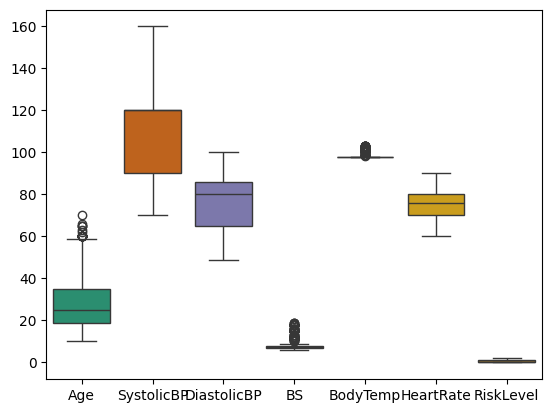

In [16]:
sns.set_palette("Dark2")

sns.boxplot(df);

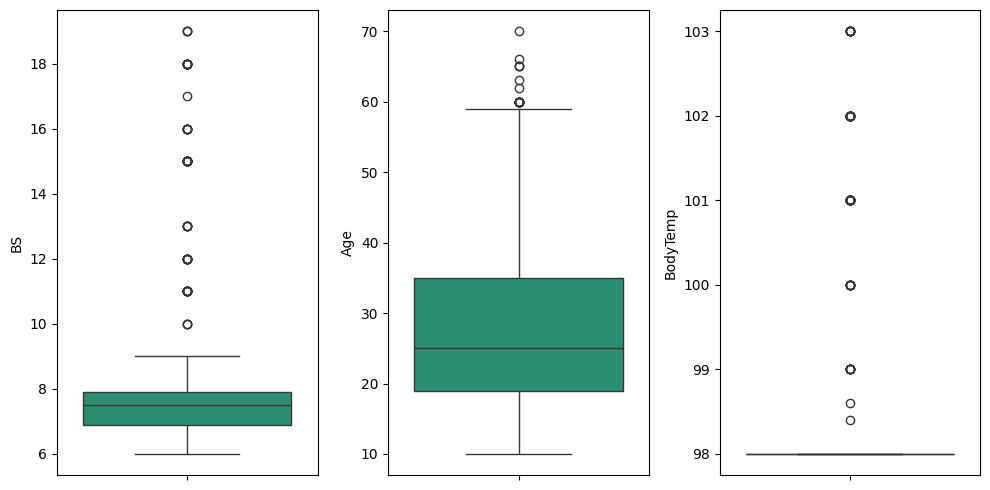

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'BS', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Age', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'BodyTemp', data = df)

plt.tight_layout()
plt.show();

**Exploratory Data Analysis**

Age Column

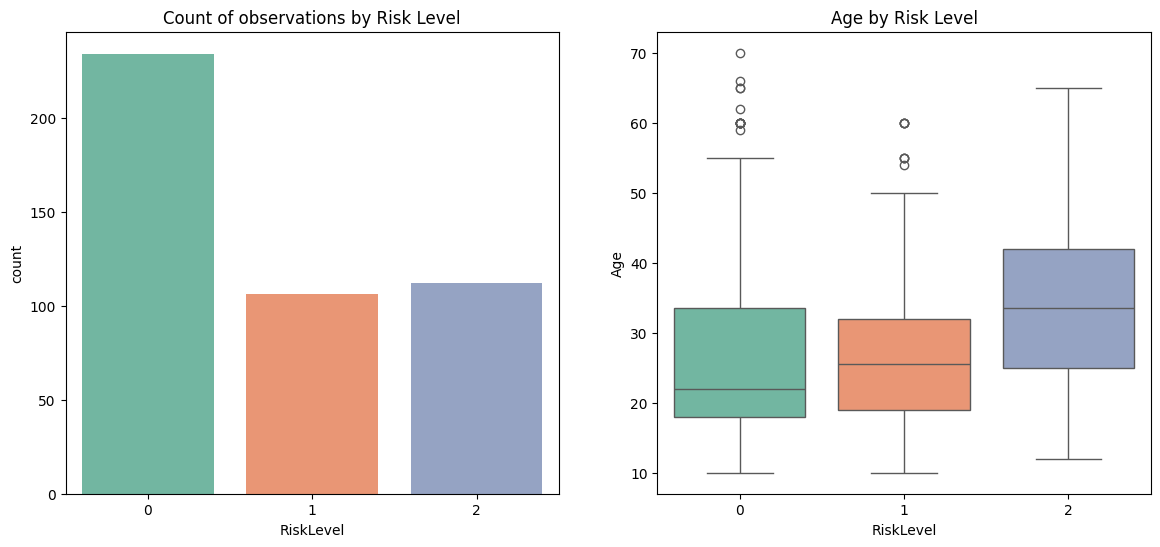

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=df.RiskLevel, palette='Set2')
axes[0].set_title("Count of observations by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.Age, palette='Set2')
axes[1].set_title("Age by Risk Level");

Blood Glucose Level

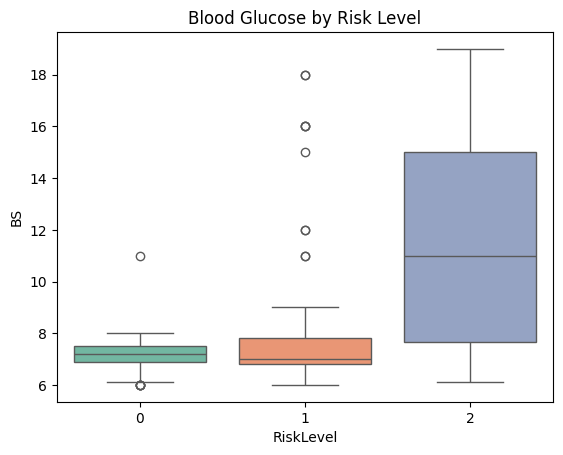

In [19]:
sns.boxplot(x=df.RiskLevel, y=df.BS, palette='Set2').set_title("Blood Glucose by Risk Level");

Blood Pressure

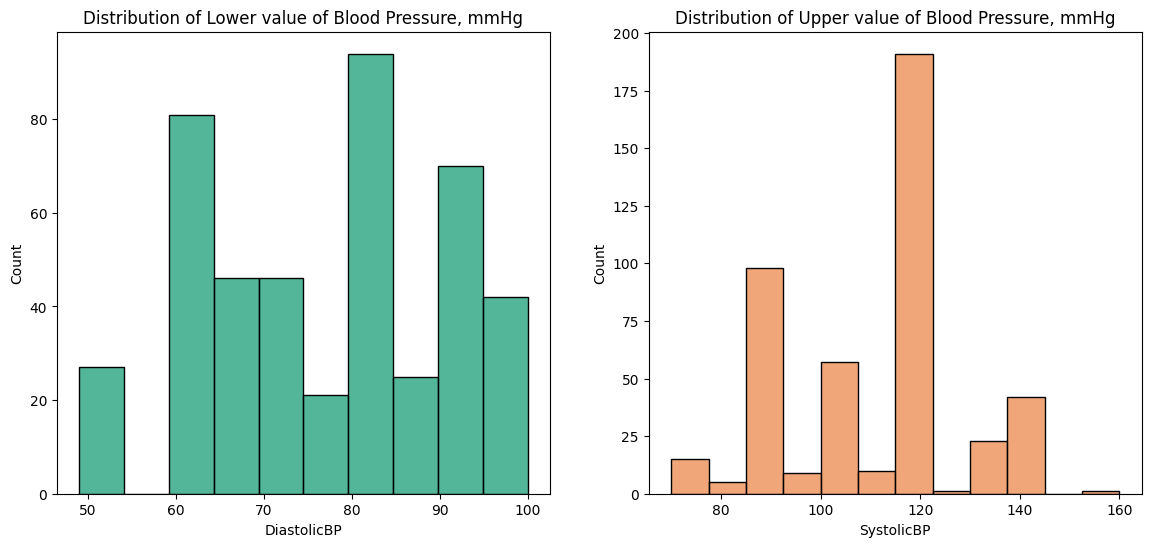

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.DiastolicBP)
axes[0].set_title("Distribution of Lower value of Blood Pressure, mmHg")

sns.histplot(ax=axes[1], x=df.SystolicBP, color="#ed894e")
axes[1].set_title("Distribution of Upper value of Blood Pressure, mmHg");


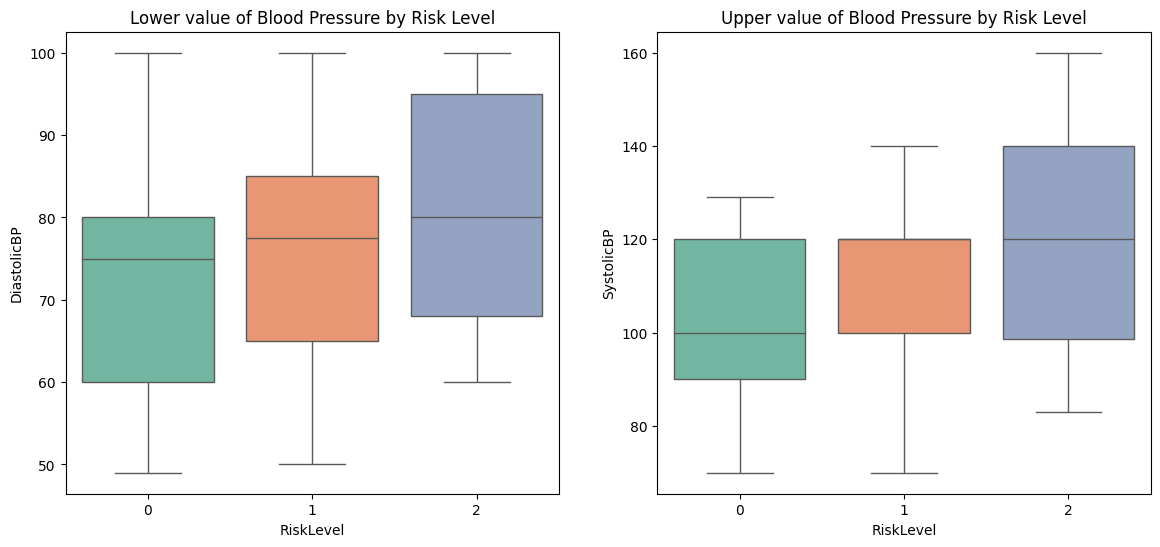

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.boxplot(ax=axes[0], x=df.RiskLevel, y=df.DiastolicBP, palette='Set2')
axes[0].set_title("Lower value of Blood Pressure by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.SystolicBP, palette='Set2')
axes[1].set_title("Upper value of Blood Pressure by Risk Level");

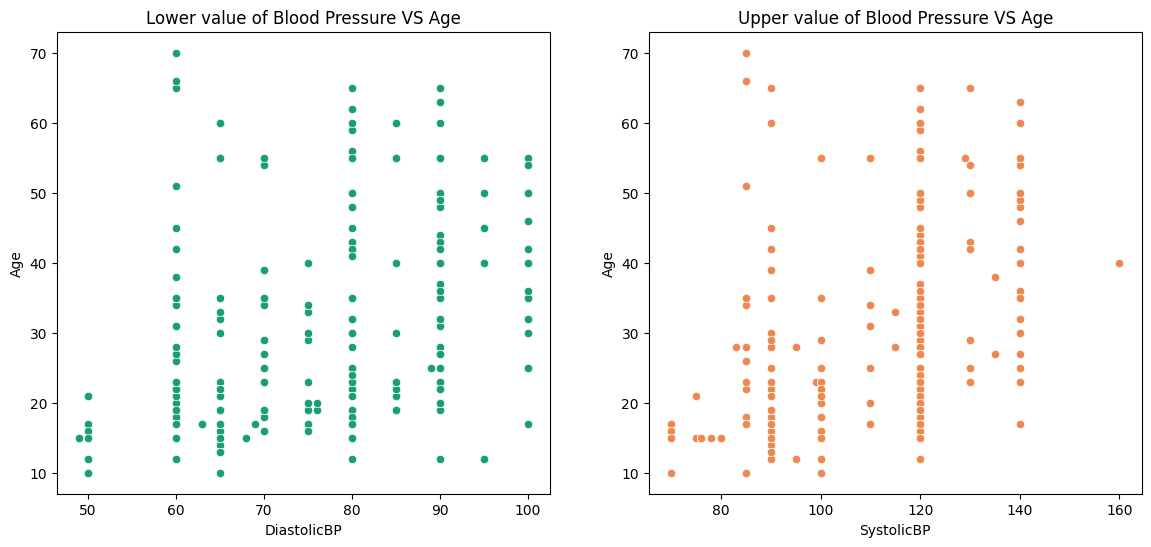

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.scatterplot(x=df.DiastolicBP, y=df.Age, ax=axes[0])
axes[0].set_title("Lower value of Blood Pressure VS Age")

sns.scatterplot(ax=axes[1], x=df.SystolicBP, y=df.Age, color="#ed894e")
axes[1].set_title("Upper value of Blood Pressure VS Age");

Body Temperature

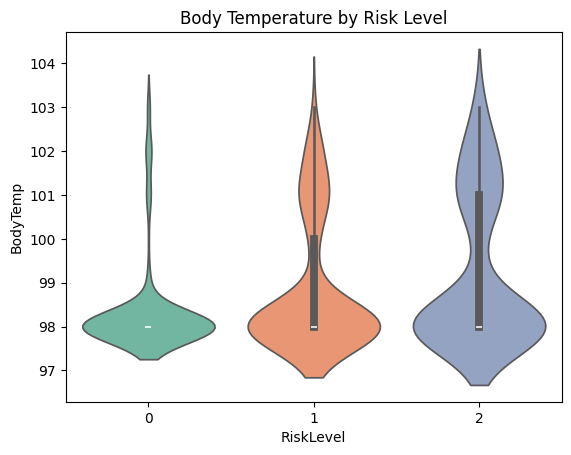

In [23]:
sns.violinplot(y=df.BodyTemp, x=df.RiskLevel, palette='Set2').set_title("Body Temperature by Risk Level");

Heart Rate

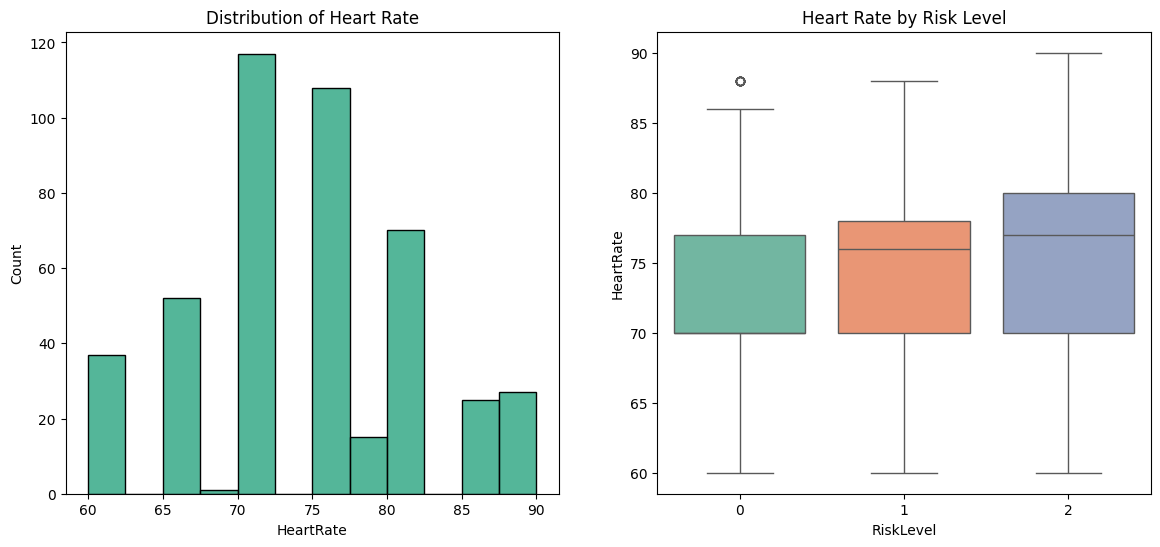

In [24]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.HeartRate, palette='Set2')
axes[0].set_title("Distribution of Heart Rate")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.HeartRate, palette='Set2')
axes[1].set_title("Heart Rate by Risk Level");

**Observations**

* Higher blood pressure (both systolic and diastolic), higher body temperature are associated with higher risk pregnancies.

* Heart rate of pregnant women is normally distributed and it's only slightly associated with risk level.

* Younger women tend to have low and mid risk pregnancies, while the pregnancies of women above 35 years old. more often are classified as high risk, meaning they need more attention.

Looking For Correlations

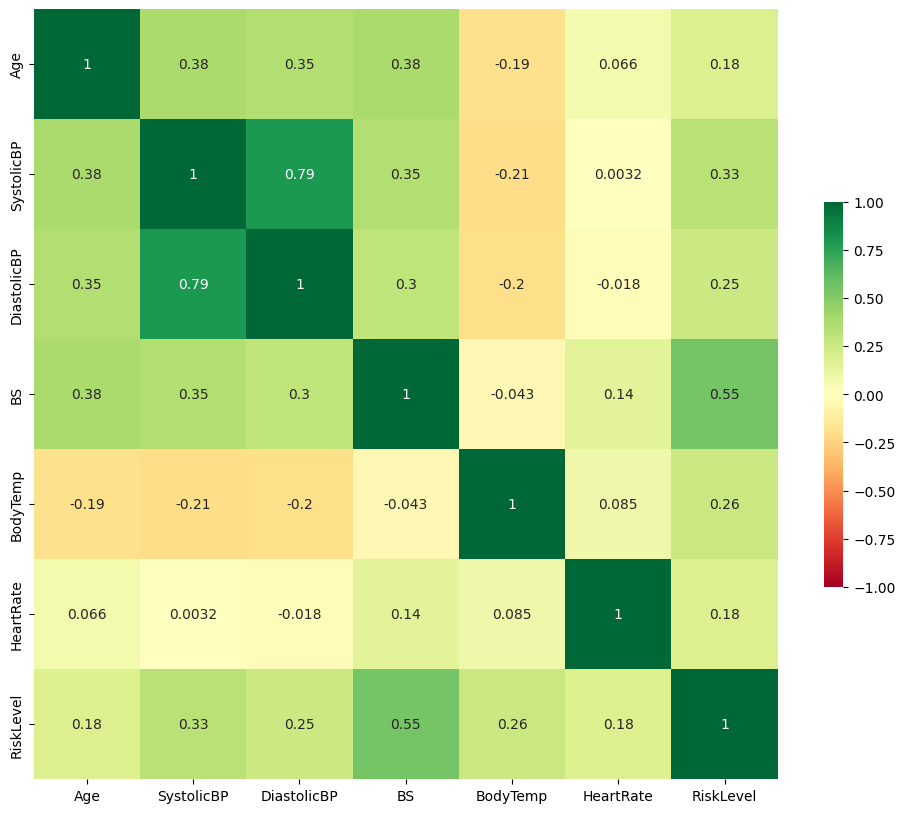

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn', vmin=-1, center=0,
           cbar_kws={"shrink": .5})

plt.show()

pairplot to see a histogram of each column

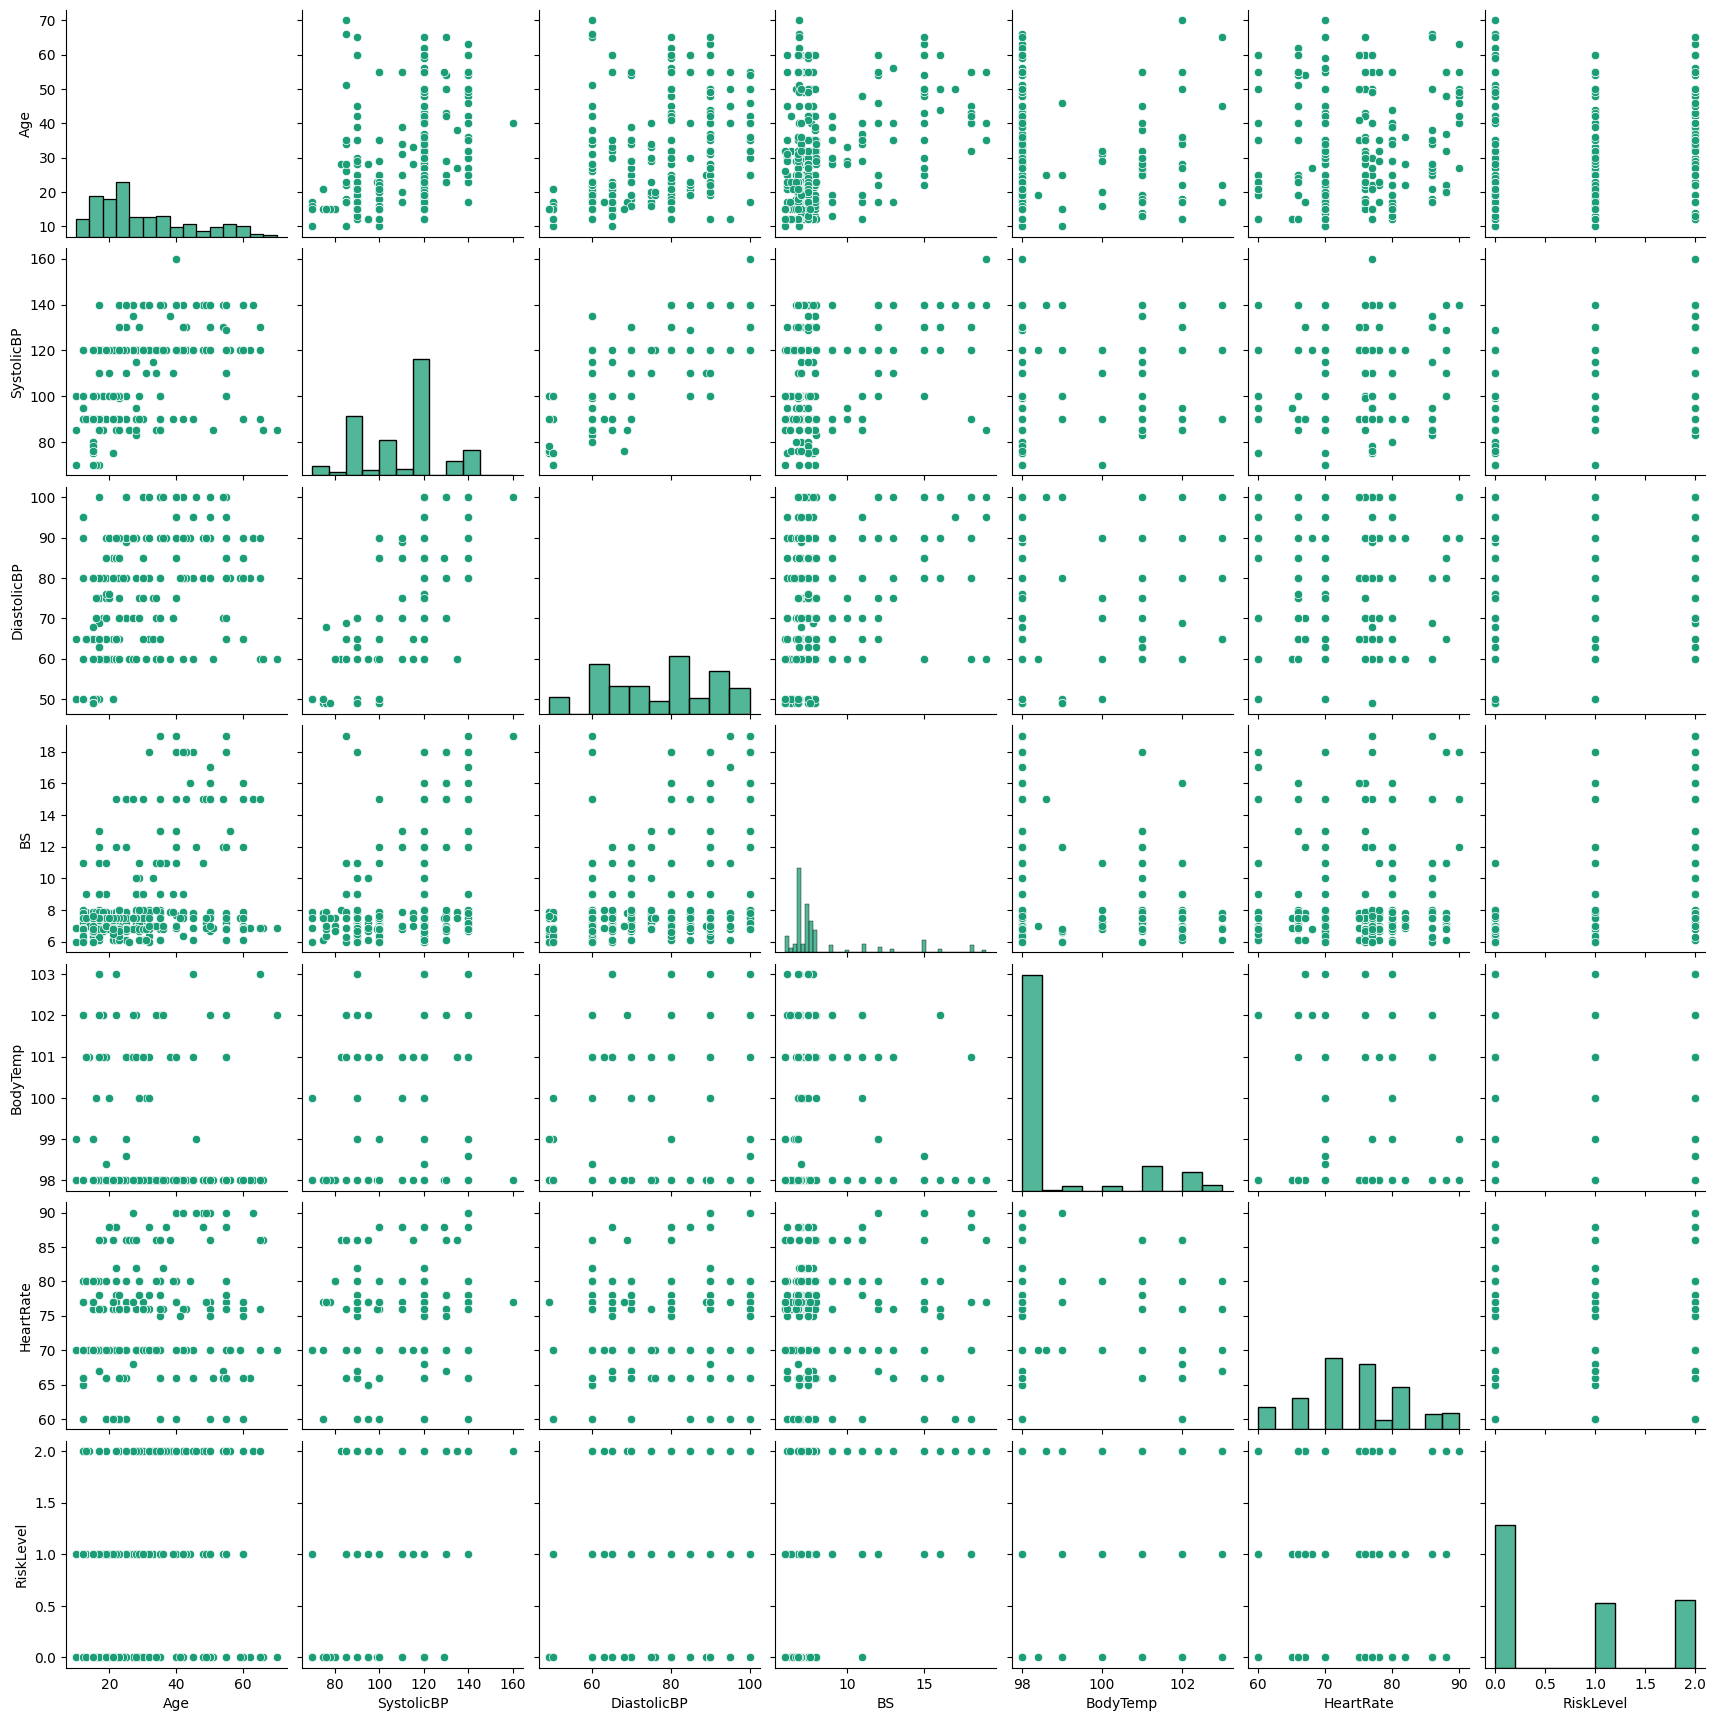

In [26]:
sns.pairplot(df);

**Data Preprocessing**

**Separate features and target**

Set a variable X equal to the features and a variable y equal to the "RiskLevel" column.

In [27]:
X = df.drop("RiskLevel", axis=1)
y = df["RiskLevel"]

**Feature Scaling**

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train / Test Split**

Split the data into training and testing sets.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [30]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

**Machine Learning Models**

**Random Forest Classifier**

Accuracy: 0.7426470588235294
F1 Score: 0.7272398304831826
Precision: 0.7213622291021672
Recall: 0.7426470588235294
Random Forest

Confusion Matrix:

[[60  7  3]
 [16 11  5]
 [ 0  4 30]]

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        70
           1       0.50      0.34      0.41        32
           2       0.79      0.88      0.83        34

    accuracy                           0.74       136
   macro avg       0.69      0.69      0.69       136
weighted avg       0.72      0.74      0.73       136



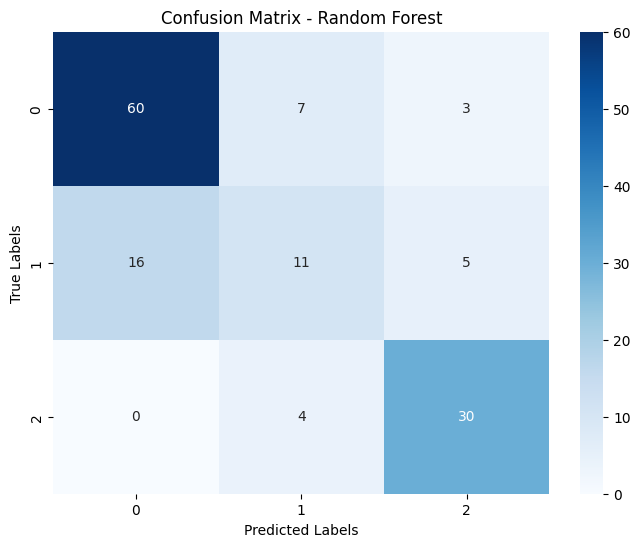

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = dict(zip(np.unique(y_train), class_weights))

# Initialize Random Forest Classifier with specified parameters
rf_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=30,
    min_samples_leaf=5,
    n_estimators=300,
    class_weight=class_weight
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Print metrics
print('Random Forest')
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())  # Or manually set: labels = ['Low', 'Moderate', 'High']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [32]:
import os
import joblib
os.makedirs("model", exist_ok=True)

# Save the model using joblib
joblib.dump(rf_model, "model/model.pkl")
print("\n✅ Model saved to 'model/model.pkl'")


✅ Model saved to 'model/model.pkl'


In [33]:
import joblib
import numpy as np

def predict_risk_level(input_data):
    # input_data must be a list in this format:
    # [Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate]

    model = joblib.load("/content/model/model.pkl")

    sample = np.array(input_data).reshape(1, -1)
    sample_scaled = scaler.transform(sample)

    prediction = model.predict(sample_scaled)[0]
    labels = {0: "Low Risk", 1: "Moderate Risk", 2: "High Risk"}

    return prediction, labels[prediction]

# Example usage:
example = [22, 120, 65, 6.0, 101.0, 76]
pred_class, pred_label = predict_risk_level(example)
print("Predicted Class:", pred_class)
print("Predicted Risk Level:", pred_label)




Predicted Class: 1
Predicted Risk Level: Moderate Risk


**Build a model using Neural Networks**

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import joblib


In [35]:
# One-hot encode labels for neural network
y_train_nn = to_categorical(y_train, num_classes=3)
y_test_nn = to_categorical(y_test, num_classes=3)

# Compute class weights for neural net
y_train_labels = np.argmax(y_train_nn, axis=1)
nn_class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
nn_weight_dict = dict(enumerate(nn_class_weights))

In [36]:
# Build the NN model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [37]:
# Train
nn_model.fit(X_train, y_train_nn,
             validation_split=0.2,
             callbacks=[early_stop],
             epochs=50,
             batch_size=16,
             class_weight=nn_weight_dict,
             verbose=1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3001 - loss: 1.6592 - val_accuracy: 0.6094 - val_loss: 1.0377
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4582 - loss: 1.1332 - val_accuracy: 0.6719 - val_loss: 0.9890
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4961 - loss: 1.1292 - val_accuracy: 0.7031 - val_loss: 0.9693
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5994 - loss: 0.9759 - val_accuracy: 0.6875 - val_loss: 0.9496
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5896 - loss: 0.8554 - val_accuracy: 0.6406 - val_loss: 0.9251
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6233 - loss: 0.8927 - val_accuracy: 0.6719 - val_loss: 0.9022
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5527 - loss: 0.9448 - val_accuracy: 0.7031 - val_loss: 0.8957
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5373 - loss: 0.9628 - val_accuracy: 0.7344 - val_

In [38]:
# Evaluate NN
loss, acc = nn_model.evaluate(X_test, y_test_nn)
print(f"✅ Neural Network Accuracy: {acc:.4f}")

y_pred_nn = np.argmax(nn_model.predict(X_test), axis=1)
y_true_nn = np.argmax(y_test_nn, axis=1)
print("Classification Report:\\n", classification_report(y_true_nn, y_pred_nn))
print("Confusion Matrix:\\n", confusion_matrix(y_true_nn, y_pred_nn))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6320 - loss: 0.7884  
✅ Neural Network Accuracy: 0.6618
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Classification Report:\n               precision    recall  f1-score   support

           0       0.76      0.76      0.76        70
           1       0.38      0.38      0.38        32
           2       0.74      0.74      0.74        34

    accuracy                           0.66       136
   macro avg       0.62      0.62      0.62       136
weighted avg       0.66      0.66      0.66       136

Confusion Matrix:\n [[53 13  4]
 [15 12  5]
 [ 2  7 25]]


**XGBoost Classifier**

Accuracy: 0.7647058823529411
F1 Score: 0.7298055974526563
Precision: 0.7485677273390746
Recall: 0.7647058823529411

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85        70
           1       0.62      0.25      0.36        32
           2       0.87      0.79      0.83        34

    accuracy                           0.76       136
   macro avg       0.75      0.68      0.68       136
weighted avg       0.75      0.76      0.73       136



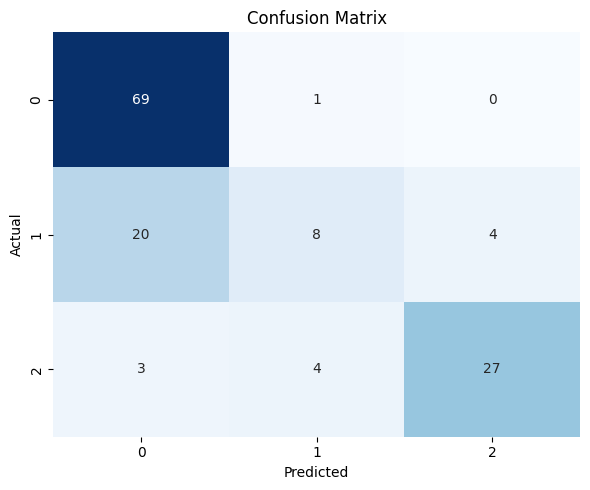

In [39]:
# Initialize the XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBClassifier(
    n_estimators=50,
    eta = 0.1,
    max_depth = 2,
    min_child_weight = 2,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
    )
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# --- Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix Plot ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()